In [4]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


In [6]:
#the analysis should include one cleaning task (or more)
df['Number Scoring Below 65'] = pd.to_numeric(df['Number Scoring Below 65'], errors='coerce')
avgSchool_Score = df.groupby('School Name')['Number Scoring Below 65'].mean()
print(avgSchool_Score)
avgSchool_Score_exam = df.groupby(['School Name', 'Regents Exam'])['Number Scoring Below 65'].mean()
print(avgSchool_Score_exam)

School Name
47 The American Sign Language and English Secondar    13.400966
A. Philip Randolph Campus High School                 36.163488
ACORN Community High School                           26.213198
Abraham Lincoln High School                           82.486486
Abraham Lincoln Yabc                                  11.121795
                                                        ...    
Young Women's Leadership School                       12.784553
Young Women's Leadership School of Brooklyn           14.564103
Young Women's Leadership School of the Bronx          11.357143
Young Women's Leadership School, Astoria              10.947368
Young Women's Leadership School, Queens               19.086420
Name: Number Scoring Below 65, Length: 1012, dtype: float64
School Name                                         Regents Exam                   
47 The American Sign Language and English Secondar  Algebra2/Trigonometry               9.714286
                                           

In [30]:
#pick any school in this dataset as an initial comparison point

#school with a relatively high average Regent exam score for comparison
Schcomparison = avgSchool_Score.idxmax()
print(f"The school with the highest average score below 65: {Schcomparison}")

The school with the highest average score below 65: Hillcrest High School


In [29]:
# compare above school to schools in the entire dataset, schools in a
# particular borough, or schools in a particular district


def compare_school(school_name, criteria='all'):
  """
  Compares a school's average score to other schools based on a criteria.

  Args:
    school_name: The name of the school to compare.
    criteria: The criteria for comparison (all, borough, district). Defaults to 'all'.
  """
  school_avg_score = avgSchool_Score.loc[school_name]


  if criteria == 'all':
    comparison_data = avgSchool_Score
    print(f"Comparing {school_name} to all schools:")
  elif criteria == 'School Level':
    #additional comparison point
    school_level = df.loc[df['School Name'] == school_name, 'School Level'].iloc[0]
    comparison_data = df[df['School Level'] == school_level].groupby('School Name')['Number Scoring Below 65'].mean()
    print(f"Comparing {school_name} to other schools in {school_level}:")
  else:
    print("Invalid criteria. Please choose 'all', 'borough', or 'district'.")
    return

  print(f"{school_name}'s average score: {school_avg_score}")
  print("Comparison:")
  print(comparison_data)


#compare_school(Schcomparison, criteria='all')
compare_school(Schcomparison, criteria='School Level')




Comparing Hillcrest High School to other schools in High school:
Hillcrest High School's average score: 110.75878220140515
Comparison:
School Name
47 The American Sign Language and English Secondar    13.400966
A. Philip Randolph Campus High School                 36.163488
ACORN Community High School                           26.213198
Abraham Lincoln High School                           82.486486
Abraham Lincoln Yabc                                  11.121795
                                                        ...    
Williamsburg Preparatory School                       19.793443
Wings Academy                                         34.458515
Women's Academy of Excellence                         19.946078
World Academy for Total Community Health High Scho    18.530303
World View High School                                21.798206
Name: Number Scoring Below 65, Length: 457, dtype: float64


In [ ]:
#pick a feature/measure/score

avgSchool_Score = df.groupby('School Name')['Number Scoring Below 65'].mean()
print(avgSchool_Score)

School Name
47 The American Sign Language and English Secondar    13.400966
A. Philip Randolph Campus High School                 36.163488
ACORN Community High School                           26.213198
Abraham Lincoln High School                           82.486486
Abraham Lincoln Yabc                                  11.121795
                                                        ...    
Young Women's Leadership School                       12.784553
Young Women's Leadership School of Brooklyn           14.564103
Young Women's Leadership School of the Bronx          11.357143
Young Women's Leadership School, Astoria              10.947368
Young Women's Leadership School, Queens               19.086420
Name: Number Scoring Below 65, Length: 1012, dtype: float64


In [ ]:
#the analysis should include some descriptive statistics
print("\nDescriptive Statistics for Number Scoring Below 65:")
print(df['Number Scoring Below 65'].describe())


Descriptive Statistics for Number Scoring Below 65:
count    137109.000000
mean         25.140297
std          37.155199
min           0.000000
25%           5.000000
50%          13.000000
75%          31.000000
max         697.000000
Name: Number Scoring Below 65, dtype: float64


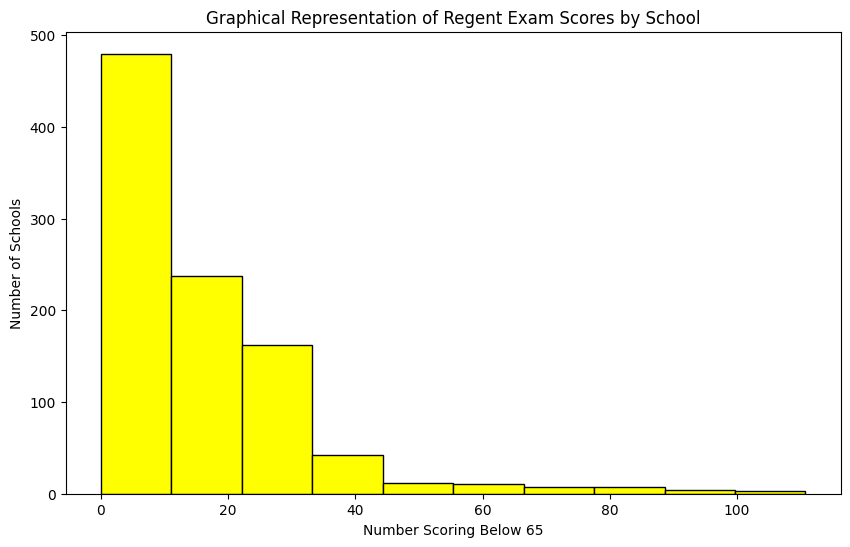

In [31]:
#the analysis should include one visualization
import matplotlib.pyplot as plt

# Visualization: Histogram of average scores
plt.figure(figsize=(10, 6))
plt.hist(avgSchool_Score, bins=10, color='yellow', edgecolor='black')
plt.title('Graphical Representation of Regent Exam Scores by School')
plt.xlabel('Number Scoring Below 65')
plt.ylabel('Number of Schools')
plt.show()

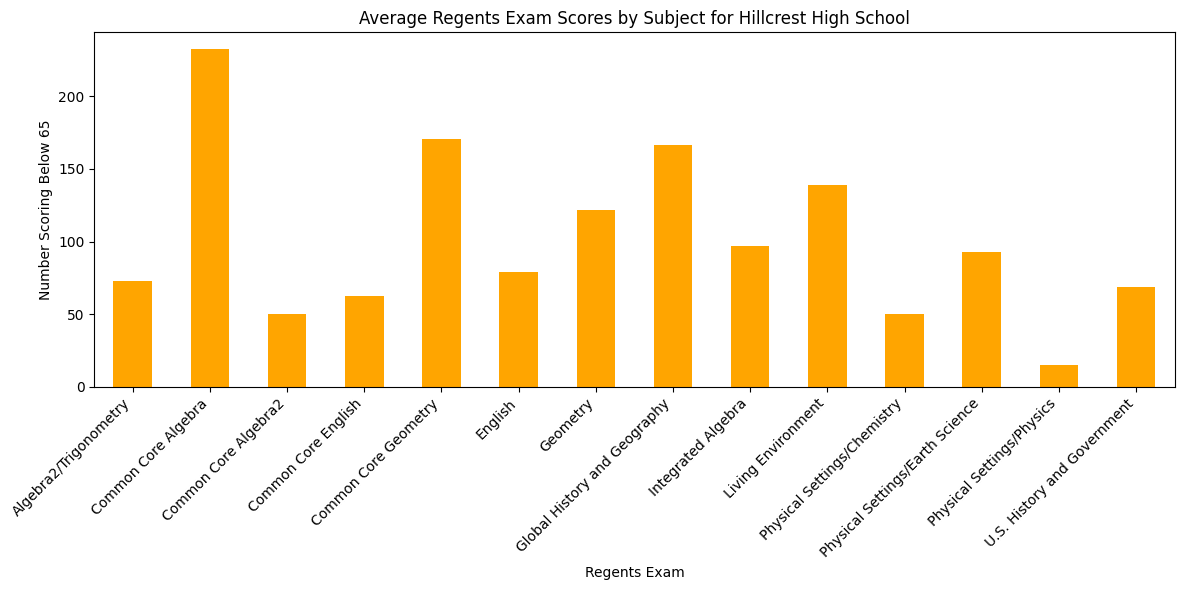

In [32]:
#the analysis should include one visualization
average_scores_by_subject_for_school = df[df['School Name'] == Schcomparison].groupby('Regents Exam')['Number Scoring Below 65'].mean()

plt.figure(figsize=(12, 6))
average_scores_by_subject_for_school.plot(kind='bar', color='orange')
plt.title(f'Average Regents Exam Scores by Subject for {Schcomparison}')
plt.xlabel('Regents Exam')
plt.ylabel('Number Scoring Below 65')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
#the analysis should include a brief conclusion statement

print("\nConclusion:")
print("The analysis revealed that", Schcomparison, "has the highest average score below 65.")
print("The analysis also highlights the average score below 65 across different subjects for", Schcomparison)


Conclusion:
The analysis revealed that Hillcrest High School has the highest average score below 65.
The analysis also highlights the average score below 65 across different subjects for Hillcrest High School
